In [2]:
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [4]:
data=pd.read_csv("D:\\DATA_science\\DATA_science assignment\\Clustering\\crime_data.csv")

In [5]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [9]:
df_norm=norm_func(data.iloc[:,1:])
df_norm;

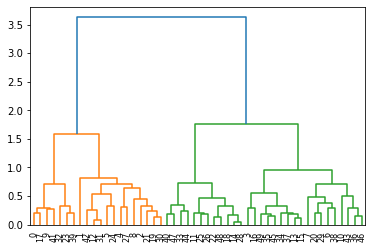

In [15]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='ward'))

In [16]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward') # or use complete linkage gives better clusters.

In [17]:
y_hc=hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters;

In [18]:
data2=pd.concat([data,Clusters],axis=1)

In [19]:
data2.groupby(['Clusters']).count() 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Clusters,,,,,
0,20,20,20,20,20
1,18,18,18,18,18
2,12,12,12,12,12
